In [4]:
import numpy as np
import pandas as pd
import os 
import statistics as stats
import math
import xgboost as xgb

from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt


# Import the data

In [5]:
pwd

'C:\\Users\\23500'

In [6]:
os.chdir('C:\\Users\\23500\\Downloads')

In [7]:
dirName = 'C:\\Users\\23500\\Downloads\\'
dirName_training  = dirName + 'epl-training.csv'

In [8]:
df_epl_initial = pd.read_csv(dirName_training)

In [9]:
df_epl_initial.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
count,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380.000000,380.000000,380.000000
mean,1.536437,1.186640,0.684211,0.524089,13.969838,11.212753,5.901822,4.722874,10.708502,11.136842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.678368,4.105500,5.045342
std,1.310048,1.170426,0.838843,0.738293,5.495908,4.729521,3.408996,2.851796,3.440885,3.616051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.522706,1.085824,3.950274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.120000,3.070000,1.370000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,3.000000,8.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.660000,3.440000,2.462500
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,5.000000,4.000000,11.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.185000,3.665000,3.665000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,13.000000,13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.025000,4.372500,5.952500
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,28.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.400000,10.740000,26.180000


In [10]:
df_epl_initial.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,2008/8/16,Arsenal,West Brom,1,0,H,1,0,H,H Webb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/8/16,Bolton,Stoke,3,1,H,3,0,H,C Foy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/8/16,Everton,Blackburn,2,3,A,1,1,D,A Marriner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/8/16,Hull,Fulham,2,1,H,1,1,D,P Walton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/8/16,Middlesbrough,Tottenham,2,1,H,0,0,D,M Atkinson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# remove unnamed columns from dataset

df_epl_cleaned = df_epl_initial.drop(df_epl_initial.columns[list(range(22,73))],axis=1) 

In [12]:
df_epl_cleaned.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2008/8/16,Arsenal,West Brom,1,0,H,1,0,H,H Webb,...,14,4,11,8,7,5,0,0,0,0
1,2008/8/16,Bolton,Stoke,3,1,H,3,0,H,C Foy,...,8,2,13,12,4,3,1,2,0,0
2,2008/8/16,Everton,Blackburn,2,3,A,1,1,D,A Marriner,...,5,11,11,9,3,5,2,2,0,0
3,2008/8/16,Hull,Fulham,2,1,H,1,1,D,P Walton,...,6,6,10,9,5,6,3,0,0,0
4,2008/8/16,Middlesbrough,Tottenham,2,1,H,0,0,D,M Atkinson,...,10,5,11,12,7,9,1,2,0,0


In [13]:
# remove referee column from dataset

df_epl = df_epl_cleaned.drop(df_epl_cleaned.columns[[9]], axis = 1)

In [14]:
df_epl.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2008/8/16,Arsenal,West Brom,1,0,H,1,0,H,24,...,14,4,11,8,7,5,0,0,0,0
1,2008/8/16,Bolton,Stoke,3,1,H,3,0,H,14,...,8,2,13,12,4,3,1,2,0,0
2,2008/8/16,Everton,Blackburn,2,3,A,1,1,D,10,...,5,11,11,9,3,5,2,2,0,0
3,2008/8/16,Hull,Fulham,2,1,H,1,1,D,11,...,6,6,10,9,5,6,3,0,0,0
4,2008/8/16,Middlesbrough,Tottenham,2,1,H,0,0,D,14,...,10,5,11,12,7,9,1,2,0,0


In [15]:
epl_array = df_epl.to_numpy()
print(epl_array)
print(epl_array.shape)

[['2008/8/16' 'Arsenal' 'West Brom' ... 0 0 0]
 ['2008/8/16' 'Bolton' 'Stoke' ... 2 0 0]
 ['2008/8/16' 'Everton' 'Blackburn' ... 2 0 0]
 ...
 ['2021/5/23' 'Sheffield United' 'Burnley' ... 1 0 0]
 ['2021/5/23' 'West Ham' 'Southampton' ... 3 0 0]
 ['2021/5/23' 'Wolves' 'Man United' ... 1 0 0]]
(4940, 21)


In [16]:
epl_array.tolist()
# define a function that splits the dataset into separate datasets for each season

def get_season(year):
    season_database = []
    if year == '08':
        for i in range(380):
            season_database.append(epl_array[i])
    elif year == '09':
        for i in range(380,760):
            season_database.append(epl_array[i])
    elif year == '10':
        for i in range(760,1140):
            season_database.append(epl_array[i])
    elif year == '11':
        for i in range(1140,1520):
            season_database.append(epl_array[i])
    elif year == '12':
        for i in range(1520,1900):
            season_database.append(epl_array[i])
    elif year == '13':
        for i in range(1900,2280):
            season_database.append(epl_array[i])
    elif year == '14':
        for i in range(2280,2660):
            season_database.append(epl_array[i])
    elif year == '15':
        for i in range(2660,3040):
            season_database.append(epl_array[i])
    elif year == '16':
        for i in range(3040,3420):
            season_database.append(epl_array[i])
    elif year == '17':
        for i in range(3420,3800):
            season_database.append(epl_array[i])
    elif year == '18':
        for i in range(3800,4180):
            season_database.append(epl_array[i])
    elif year == '19':
        for i in range(4180,4560):
            season_database.append(epl_array[i])
    elif year == '20':
        for i in range(4560,4940):
            season_database.append(epl_array[i])
    return season_database

In [17]:
# create a function that returns a list with the teams competing in a particular season

def get_teams(year):
    epl_get_teams = get_season(year)
    teams = []
    for j in range(len(epl_get_teams)):
        if epl_get_teams[j][1] in teams:
            pass
        else:
            teams.append(epl_get_teams[j][1])
    return teams

In [18]:
# define a function that gives 3, 1, 0 (3 points for a win, 1 point for a draw, 0 for a loss) for the home team and 3,1,0 for the away team
# the first new column added has the home team points, while the second column has the away team points
# this is useful to then define a win streak feature later
def get_points(year):
    season_data = get_season(year)
    for i in range(len(season_data)):
        if season_data[i][5] == 'H':
            season_data[i] = np.append(season_data[i],3)
            season_data[i] = np.append(season_data[i],0)
        elif season_data[i][5] == 'D':
            season_data[i] = np.append(season_data[i],1)
            season_data[i] = np.append(season_data[i],1)
        elif season_data[i][5] == 'A':
            season_data[i] = np.append(season_data[i],0)
            season_data[i] = np.append(season_data[i],3)
    return season_data

In [19]:
# define a function that gives the win streak for each team in a particular season based on 5 previous games
# we will ignore the first 5 weeks of games since we have no data for the previous 5 games of the games in those weeks
def win_streak(year):
    season_data = get_points(year)
    teams = get_teams(year)
    for team in teams:
        for i in range(50,len(season_data)):
            count = 0
            streak = 0
            x = 0
            if team == season_data[i][1]:
                for j in range(1,i):
                    if (team == season_data[i-j][1]  and x < 5):
                        streak = streak + season_data[i-j][21]
                        x += 1
                    elif (team == season_data[i-j][2] and x < 5):
                        streak = streak + season_data[i-j][22]
                        x += 1
                season_data[i] = np.append(season_data[i],streak)
    for team in teams:
        for i in range(50,len(season_data)):
            streak = 0
            count = 0
            x = 0
            if team == season_data[i][2]:
                for j in range(1,i):
                    if (team == season_data[i-j][1]  and x < 5):
                        streak = streak + season_data[i-j][21]
                        x += 1
                    elif (team == season_data[i-j][2] and x < 5):
                        streak = streak + season_data[i-j][22]
                        x += 1
                season_data[i] = np.append(season_data[i],streak)
    return season_data

In [20]:
# define a function that gives form for each team in a particular season based on 5 previous games (form is weighed more heavily if the team is playing the game at home)
# we ignore the first 5 weeks of the season since we have no data to calculate form
# first set of for loops calcualtes form for the home team, second set calculates it for the away team
# performance of the most recent game is weighed more, and so on for each previous performance

def get_form(year):
    season_data = win_streak(year)
    teams = get_teams(year)
    for team in teams:
        for i in range(50,len(season_data)):
            x = 0
            goals_form = 0
            shots_form = 0
            corners_form = 0
            k = 5
            if team == season_data[i][1]:
                for j in range(1,i):
                    if (team == season_data[i-j][1]  and x < 5):
                        goals_form += k*season_data[i-j][3]
                        shots_form += k *season_data[i-j][11]
                        corners_form += k*season_data[i-j][15]
                        x += 1
                        k -= 1
                    elif (team == season_data[i-j][2] and x < 5):
                        goals_form += k*season_data[i-j][4]
                        shots_form += k*season_data[i-j][12]
                        corners_form += k*season_data[i-j][16]
                        x += 1
                        k -= 1
                form = 1.05*((3)*goals_form + (2)*shots_form + (1)*corners_form)
                season_data[i] = np.append(season_data[i],round(form,2))
    for team in teams:
        for i in range(50,len(season_data)):
            goals_form = 0
            shots_form = 0
            corners_form = 0
            x = 0
            k = 5
            if team == season_data[i][2]:
                for j in range(1,i):
                    if (team == season_data[i-j][1]  and x < 5):
                        goals_form += k*season_data[i-j][3]
                        shots_form += k*season_data[i-j][11]
                        corners_form += k*season_data[i-j][15]
                        x += 1
                        k -= 1
                    elif (team == season_data[i-j][2] and x < 5):
                        goals_form += k*season_data[i-j][4]
                        shots_form += k*season_data[i-j][12]
                        corners_form += k*season_data[i-j][16]
                        x += 1
                        k -= 1
                form = (3)*goals_form + (2)*shots_form + (1)*corners_form
                season_data[i] = np.append(season_data[i],round(form,2))
    return season_data


In [21]:
# define a function that penalizes a team if it got yellow cards or red cards in the previous match (red cards are weighed more)
def get_cards(year):
    season_data = get_form(year)
    teams = get_teams(year)
    for team in teams:
        for i in range(10,len(season_data)):
            x = 0
            red_cards = 0
            yellow_cards = 0
            if team == season_data[i][1]:
                for j in range(1,i):
                    if (team == season_data[i-j][1]  and x < 1):
                        yellow_cards += season_data[i-j][17]
                        red_cards += season_data[i-j][19]
                        x += 1
                    elif (team == season_data[i-j][2] and x < 1):
                        yellow_cards += season_data[i-j][18]
                        red_cards += season_data[i-j][20]
                        x += 1
                cards = 5*red_cards + 2*yellow_cards
                season_data[i] = np.append(season_data[i],round(cards,2))
    for team in teams:
        for i in range(10,len(season_data)):
            yellow_cards = 0
            red_cards = 0
            x = 0
            if team == season_data[i][2]:
                for j in range(1,i):
                    if (team == season_data[i-j][1]  and x < 1):
                        yellow_cards += season_data[i-j][17]
                        red_cards += season_data[i-j][19]
                        x += 1
                    elif (team == season_data[i-j][2] and x < 1):
                        yellow_cards += season_data[i-j][18]
                        red_cards += season_data[i-j][20]
                        x += 1
                cards = 5*red_cards + 2*yellow_cards
                season_data[i] = np.append(season_data[i],round(cards,2))
    return season_data



In [22]:
# scrape FIFA ratings from fifaindex.com for each season
ratings = []
urls = ['fifa09_5', 'fifa10_6', 'fifa11_7', 'fifa12_8', 'fifa13_11', 'fifa14_12', 'fifa15_16', 'fifa16_19', 'fifa17_74', 'fifa18_175','fifa19_280','fifa20_358', 'fifa21_421']
for item in urls:
    url = 'https://www.fifaindex.com/teams/' + item +'/?league=13&order=desc'
    ratings.append(pd.read_html(url)) # Returns list of all tables on page

In [23]:
# clean up the scraped data (FIFA ratings) and divide it for each season
for i in range(13):
    ratings[i] = np.array(ratings[i])
    ratings[i] = ratings[i].reshape(28,100)
    ratings[i] = np.delete(ratings[i], slice(7,100),axis=1)
    ratings[i] = np.delete(ratings[i], [0,2],axis=1)
    ratings[i] = np.delete(ratings[i], [0,1,7,8,14,15,21,22],axis=0)

In [24]:
# rename the teams in the ratings dataset so that the names match with those in the dataset that was provided initially
# for example, the ratings dataset has "Manchester City" while the original dataset has "Man City"
# making the names match is useful for the functions that will be used later on
ratings = np.array(ratings)
print(ratings[11])
for i in range(13):
    for j in range (20):
        if ratings[i][j][0] == 'Manchester United':
            ratings[i][j][0] = 'Man United'
        if ratings[i][j][0] == 'Manchester City':
            ratings[i][j][0] = 'Man City'
        if ratings[i][j][0] == 'Tottenham Hotspur':
            ratings[i][j][0] = 'Tottenham'
        if ratings[i][j][0] == 'Newcastle United':
            ratings[i][j][0] = 'Newcastle'
        if ratings[i][j][0] == 'Blackburn Rovers':
            ratings[i][j][0] = 'Blackburn'
        if ratings[i][j][0] == 'West Ham United':
            ratings[i][j][0] = 'West Ham'
        if ratings[i][j][0] == 'Bolton Wanderers':
            ratings[i][j][0] = 'Bolton'
        if ratings[i][j][0] == 'Wigan Athletic':
            ratings[i][j][0] = 'Wigan'
        if ratings[i][j][0] == 'Hull City':
            ratings[i][j][0] = 'Hull'
        if ratings[i][j][0] == 'West Bromwich':
            ratings[i][j][0] = 'West Brom'
        if ratings[i][j][0] == 'West Bromwich Albion':
            ratings[i][j][0] = 'West Brom'
        if ratings[i][j][0] == 'Stoke City':
            ratings[i][j][0] = 'Stoke'
        if ratings[i][j][0] == 'Wolverhampton Wanderers':
            ratings[i][j][0] = 'Wolves'
        if ratings[i][j][0] == 'Birmingham City':
            ratings[i][j][0] = 'Birmingham'
        if ratings[i][j][0] == 'Queens Park Rangers':
            ratings[i][j][0] = 'QPR'
        if ratings[i][j][0] == 'Swansea City':
            ratings[i][j][0] = 'Swansea'
        if ratings[i][j][0] == 'Norwich City':
            ratings[i][j][0] = 'Norwich'
        if ratings[i][j][0] == 'Cardiff City':
            ratings[i][j][0] = 'Cardiff'
        if ratings[i][j][0] == 'Leicester City':
            ratings[i][j][0] = 'Leicester'
        if ratings[i][j][0] == 'Huddersfield Town':
            ratings[i][j][0] = 'Huddersfield'
        if ratings[i][j][0] == 'Brighton & Hove Albion':
            ratings[i][j][0] = 'Brighton'
        if ratings[i][j][0] == 'AFC Bournemouth':
            ratings[i][j][0] = 'Bournemouth'
        if ratings[i][j][0] == 'Leeds United':
            ratings[i][j][0] = 'Leeds' 
        

[['Manchester City' 86.0 87.0 83.0 86.0]
 ['Liverpool' 86.0 83.0 84.0 84.0]
 ['Tottenham Hotspur' 86.0 83.0 82.0 83.0]
 ['Arsenal' 86.0 82.0 80.0 81.0]
 ['Manchester United' 83.0 79.0 80.0 81.0]
 ['Chelsea' 79.0 84.0 80.0 81.0]
 ['Everton' 77.0 79.0 80.0 79.0]
 ['West Ham United' 83.0 79.0 76.0 78.0]
 ['Leicester City' 79.0 77.0 77.0 78.0]
 ['Wolverhampton Wanderers' 77.0 80.0 77.0 78.0]
 ['Watford' 77.0 79.0 76.0 78.0]
 ['AFC Bournemouth' 79.0 77.0 76.0 77.0]
 ['Newcastle United' 78.0 76.0 76.0 77.0]
 ['Crystal Palace' 75.0 77.0 76.0 77.0]
 ['Burnley' 77.0 76.0 76.0 76.0]
 ['Brighton & Hove Albion' 76.0 76.0 75.0 76.0]
 ['Southampton' 75.0 76.0 76.0 76.0]
 ['Aston Villa' 76.0 75.0 74.0 75.0]
 ['Norwich City' 76.0 73.0 72.0 74.0]
 ['Sheffield United' 73.0 73.0 73.0 73.0]]


In [25]:
# define  a function that splits the ratings array into separate arrays for each season
def get_season_ratings(year):
    season_database = []
    if year == '08':
        season_database.append(ratings[0])
    elif year == '09':
        season_database.append(ratings[1])
    elif year == '10':
        season_database.append(ratings[2])
    elif year == '11':
        season_database.append(ratings[3])
    elif year == '12':
        season_database.append(ratings[4])
    elif year == '13':
        season_database.append(ratings[5])
    elif year == '14':
        season_database.append(ratings[6])
    elif year == '15':
        season_database.append(ratings[7])
    elif year == '16':
        season_database.append(ratings[8])
    elif year == '17':
        season_database.append(ratings[9])
    elif year == '18':
        season_database.append(ratings[10])
    elif year == '19':
        season_database.append(ratings[11])
    elif year == '20':
        season_database.append(ratings[12])
    return season_database


In [26]:
#define a function that adds attack ratings for each team every season
def get_att(year):
    season_data = get_cards(year)
    season_rating = get_season_ratings(year)
    teams = get_teams(year)
    for team in teams:
        for i in range(len(season_data)):
            for j in range(20):
                if team == season_data[i][1] and team == season_rating[0][j][0]:
                    attack_rating = season_rating[0][j][1] 
                    season_data[i] = np.append(season_data[i],attack_rating)
    for team in teams:
        for i in range(len(season_data)):
            for j in range(20):
                if team == season_data[i][2] and team == season_rating[0][j][0]:
                    attack_rating = season_rating[0][j][1] 
                    season_data[i] = np.append(season_data[i],attack_rating)
    return season_data



In [27]:
#define a function that adds midfield ratings for each team every season
def get_mid(year):
    season_data = get_att(year)
    season_rating = get_season_ratings(year)
    teams = get_teams(year)
    for team in teams:
        for i in range(len(season_data)):
            for j in range(20):
                if team == season_data[i][1] and team == season_rating[0][j][0]:
                    mid_rating = season_rating[0][j][2] 
                    season_data[i] = np.append(season_data[i],mid_rating)
    for team in teams:
        for i in range(len(season_data)):
            for j in range(20):
                if team == season_data[i][2] and team == season_rating[0][j][0]:
                    mid_rating = season_rating[0][j][2] 
                    season_data[i] = np.append(season_data[i],mid_rating)
    return season_data




In [28]:
#define a function that adds defense ratings for each team every season
def get_def(year):
    season_data = get_mid(year)
    season_rating = get_season_ratings(year)
    teams = get_teams(year)
    for team in teams:
        for i in range(len(season_data)):
            for j in range(20):
                if team == season_data[i][1] and team == season_rating[0][j][0]:
                    def_rating = season_rating[0][j][3] 
                    season_data[i] = np.append(season_data[i],def_rating)
    for team in teams:
        for i in range(len(season_data)):
            for j in range(20):
                if team == season_data[i][2] and team == season_rating[0][j][0]:
                    def_rating = season_rating[0][j][3] 
                    season_data[i] = np.append(season_data[i],def_rating)
    return season_data




In [29]:
#define a function that adds overall ratings for each team every season

def get_ovr(year):
    season_data = get_def(year)
    season_rating = get_season_ratings(year)
    teams = get_teams(year)
    for team in teams:
        for i in range(len(season_data)):
            for j in range(20):
                if team == season_data[i][1] and team == season_rating[0][j][0]:
                    ovr_rating = season_rating[0][j][4] 
                    season_data[i] = np.append(season_data[i],ovr_rating)
    for team in teams:
        for i in range(len(season_data)):
            for j in range(20):
                if team == season_data[i][2] and team == season_rating[0][j][0]:
                    ovr_rating = season_rating[0][j][4] 
                    season_data[i] = np.append(season_data[i],ovr_rating)
    return season_data



In [30]:
# call the final function to generate datasets with the added features for each season
data_2008 = get_ovr('08')
data_2009 = get_ovr('09')
data_2010 = get_ovr('10')
data_2011 = get_ovr('11')
data_2012 = get_ovr('12')
data_2013 = get_ovr('13')
data_2014 = get_ovr('14')
data_2015 = get_ovr('15')
data_2016 = get_ovr('16')
data_2017 = get_ovr('17')
data_2018 = get_ovr('18')
data_2019 = get_ovr('19')
data_2020 = get_ovr('20')


In [31]:
# convert the numpy arrays into pandas dataframes
df_2008 = pd.DataFrame(data_2008)
df_2009 = pd.DataFrame(data_2009)
df_2010 = pd.DataFrame(data_2010)
df_2011 = pd.DataFrame(data_2011)
df_2012 = pd.DataFrame(data_2012)
df_2013 = pd.DataFrame(data_2013)
df_2014 = pd.DataFrame(data_2014)
df_2015 = pd.DataFrame(data_2015)
df_2016 = pd.DataFrame(data_2016)
df_2017 = pd.DataFrame(data_2017)
df_2018 = pd.DataFrame(data_2018)
df_2019 = pd.DataFrame(data_2019)
df_2020 = pd.DataFrame(data_2020)


In [32]:
# drop the irrelevant columns from the dataframes
df_2008 = df_2008.drop(columns=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2008 = df_2008.drop(df_2008.index[0:50])
df_2009 = df_2009.drop(columns = [0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2009 = df_2009.drop(df_2009.index[0:50])
df_2010 = df_2010.drop(columns=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2010 = df_2010.drop(df_2010.index[0:50])
df_2011 = df_2011.drop(columns=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2011 = df_2011.drop(df_2011.index[0:50])
df_2012 = df_2012.drop(columns=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2012 = df_2012.drop(df_2012.index[0:50])
df_2013 = df_2013.drop(columns=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2013 = df_2013.drop(df_2013.index[0:50])
df_2014 = df_2014.drop(columns=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2014 = df_2014.drop(df_2014.index[0:50])
df_2015 = df_2015.drop(columns=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2015 = df_2015.drop(df_2015.index[0:50])
df_2016 = df_2016.drop(columns=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2016 = df_2016.drop(df_2016.index[0:50])
df_2017 = df_2017.drop(columns=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2017 = df_2017.drop(df_2017.index[0:50])
df_2018= df_2018.drop(columns=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2018 = df_2018.drop(df_2018.index[0:50])
df_2019 = df_2019.drop(columns=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2019 = df_2019.drop(df_2019.index[0:50])
df_2020 = df_2020.drop(columns=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df_2020 = df_2020.drop(df_2020.index[0:50])


In [33]:
#merge the data from the various seasons into one and split into a feature dataset X and a target dataset y (which only includes the outcome each match)
df_all = [df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]
data_all_seasons = pd.concat(df_all)
y_categorical = data_all_seasons[5]
X = data_all_seasons.drop(columns=[5])
X = X.reset_index(drop=True)
X = X.rename(columns = {23: 'Home_Win_Streak',24: 'Away_Win_Streak',25: 'Home_Form', 26:'Away_Form', 27:'Home_Cards', 28:'Away_Cards', 29:'Home_Attack', 30:'Away_Attack', 31:'Home_Mid', 32:'Away_Mid', 33:'Home_Defense', 34:'Away_Defense', 35:'Home_Overall', 36:'Away_Overall'})


In [34]:
# explore the dataframe containing the features (check for missing values)
X.describe()

,Home_Win_Streak,Away_Win_Streak,Home_Form,Away_Form,Home_Cards,Away_Cards,Home_Attack,Away_Attack,Home_Mid,Away_Mid,Home_Defense,Away_Defense,Home_Overall,Away_Overall
count,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000
mean,6.734499,7.013753,310.128147,306.203497,3.768298,3.396037,78.451515,78.429837,77.146387,77.134732,76.275291,76.266667,77.234033,77.223310
std,3.394707,3.358025,101.335602,98.747924,2.966027,2.817530,4.440651,4.433162,4.018321,4.011528,3.833680,3.828661,3.624321,3.616433
min,0.000000,0.000000,74.550000,73.000000,0.000000,0.000000,68.000000,68.000000,68.000000,68.000000,67.000000,67.000000,69.000000,69.000000
25%,4.000000,4.000000,237.300000,233.000000,2.000000,2.000000,75.000000,75.000000,74.000000,74.000000,73.000000,73.000000,75.000000,75.000000
50%,7.000000,7.000000,297.675000,294.500000,4.000000,2.000000,78.000000,77.000000,76.000000,76.000000,76.000000,76.000000,77.000000,77.000000
75%,9.000000,9.000000,371.437500,366.000000,6.000000,4.000000,82.000000,82.000000,80.000000,80.000000,79.000000,79.000000,80.000000,80.000000
max,15.000000,15.000000,720.300000,775.000000,24.000000,17.000000,90.000000,90.000000,87.000000,87.000000,86.000000,86.000000,86.000000,86.000000


In [35]:
X.head()

,Home_Win_Streak,Away_Win_Streak,Home_Form,Away_Form,Home_Cards,Away_Cards,Home_Attack,Away_Attack,Home_Mid,Away_Mid,Home_Defense,Away_Defense,Home_Overall,Away_Overall
0,10.0,7.0,390.60,348.0,6.0,4.0,81.0,78.0,81.0,74.0,77.0,72.0,78.0,75.0
1,7.0,11.0,389.55,483.0,2.0,2.0,82.0,85.0,75.0,83.0,78.0,80.0,78.0,81.0
2,6.0,9.0,322.35,411.0,0.0,2.0,80.0,76.0,74.0,76.0,72.0,76.0,74.0,76.0
3,5.0,4.0,307.65,354.0,14.0,4.0,86.0,75.0,85.0,75.0,84.0,72.0,84.0,74.0
4,6.0,4.0,369.60,333.0,6.0,6.0,80.0,68.0,75.0,71.0,73.0,69.0,74.0,71.0


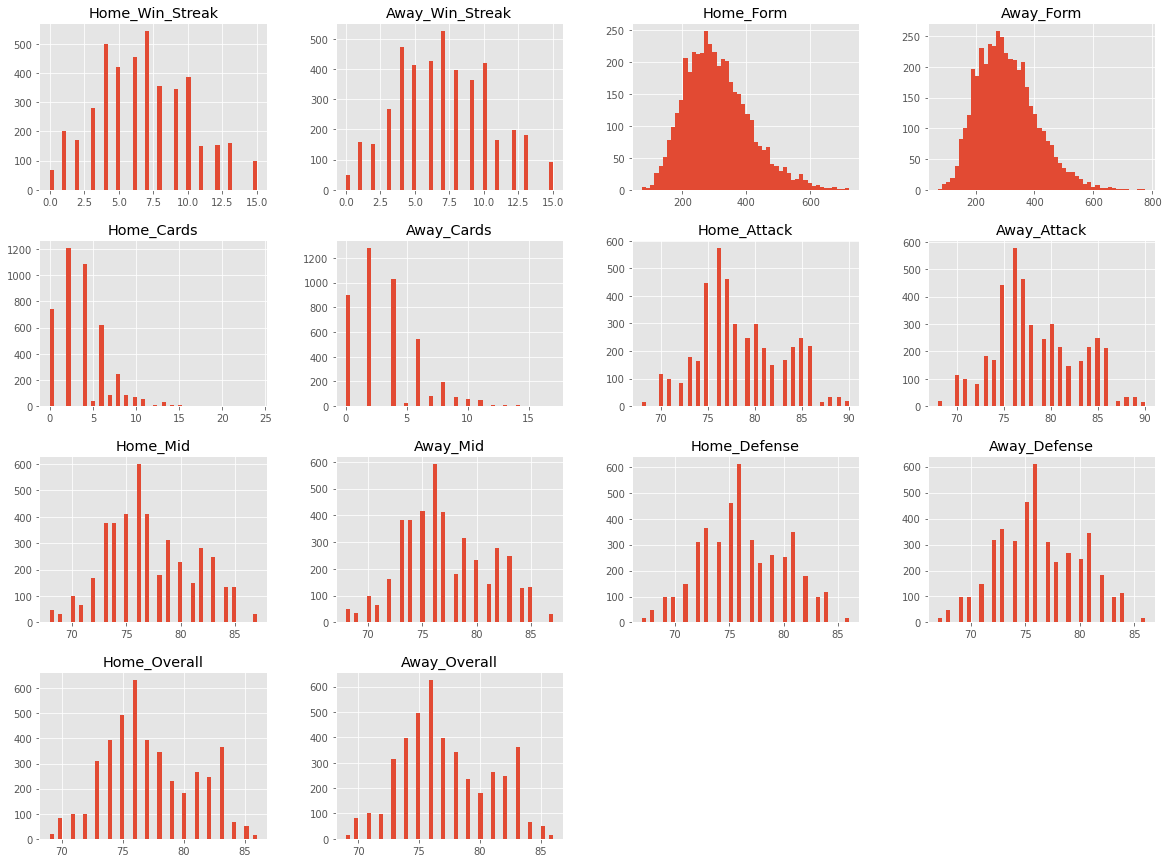

In [36]:
%matplotlib inline 
X.hist(bins=50, figsize=(20,15))
plt.show()


In [37]:
#convert categorical targets into numerical targets (H = 0, A = 1, D = 2)
y_array = y_categorical.to_numpy()
codes, uniques = pd.factorize(y_array)
y = pd.DataFrame(codes)




In [38]:
#split data into training and testing sets
X_np = X.to_numpy()
y_np = y.to_numpy()
np.isnan(X_np)
test = np.where(np.isnan(X_np))

X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

In [39]:
# create copies of the training sets and merge them to perform data visualizattion later
X_visual = X_train.copy()
data_visual = pd.DataFrame(X_visual)
data_visual= data_visual.rename(columns = {0: 'Home_Win_Streak',1: 'Away_Win_Streak',2: 'Home_Form', 3:'Away_Form', 4:'Home_Cards', 5:'Away_Cards', 6:'Home_Attack', 7:'Away_Attack', 8:'Home_Mid', 9:'Away_Mid', 10:'Home_Defense', 11:'Away_Defense', 12:'Home_Overall', 13:'Away_Overall'})
data_visual.head()

,Home_Win_Streak,Away_Win_Streak,Home_Form,Away_Form,Home_Cards,Away_Cards,Home_Attack,Away_Attack,Home_Mid,Away_Mid,Home_Defense,Away_Defense,Home_Overall,Away_Overall
0,3.0,8.0,201.60,424.0,4.0,6.0,72.0,78.0,73.0,79.0,70.0,79.0,71.0,79.0
1,10.0,8.0,389.55,345.0,10.0,2.0,77.0,74.0,77.0,75.0,74.0,73.0,77.0,74.0
2,5.0,11.0,265.65,511.0,11.0,0.0,82.0,81.0,77.0,80.0,76.0,80.0,77.0,80.0
3,8.0,7.0,324.45,189.0,8.0,2.0,86.0,75.0,82.0,77.0,80.0,76.0,81.0,77.0
4,5.0,8.0,261.45,190.0,0.0,2.0,86.0,77.0,83.0,79.0,82.0,80.0,83.0,79.0


In [40]:
# create a correlation matrix that gives the correlation of each feature with the target
corr_matrix = data_visual.corr()
corr_matrix['Away_Attack'].sort_values(ascending=False)




Away_Attack        1.000000
Away_Overall       0.910281
Away_Defense       0.858385
Away_Mid           0.852077
Away_Win_Streak    0.486499
Away_Form          0.459179
Home_Mid           0.040606
Home_Defense       0.029503
Home_Win_Streak    0.024982
Home_Overall       0.020703
Home_Attack        0.017433
Home_Form         -0.006194
Home_Cards        -0.009978
Away_Cards        -0.071459
Name: Away_Attack, dtype: float64

array([[<AxesSubplot:xlabel='Home_Win_Streak', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Away_Win_Streak', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Home_Form', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Away_Form', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Home_Cards', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Away_Cards', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Home_Attack', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Away_Attack', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Home_Mid', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Away_Mid', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Home_Defense', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Away_Defense', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Home_Overall', ylabel='Home_Win_Streak'>,
        <AxesSubplot:xlabel='Away_Overall', ylabel='Home_Win_Streak'>],
       [<AxesSubplo

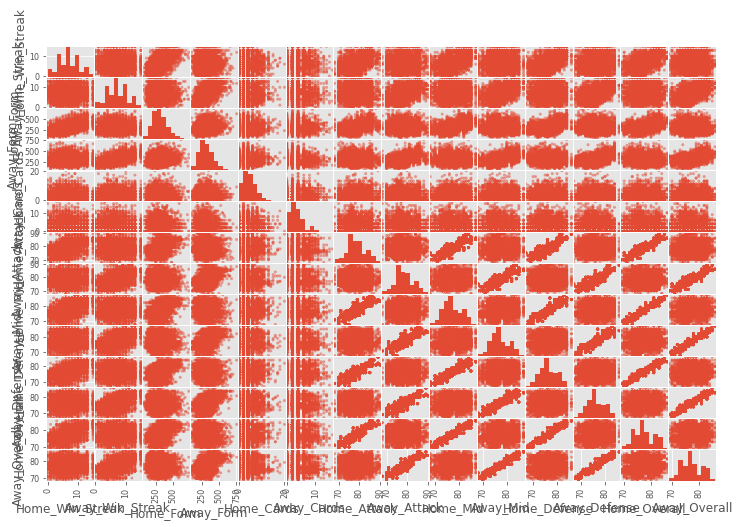

In [41]:
# plot correlations between different features

from pandas.plotting import scatter_matrix
features = ['Home_Win_Streak','Away_Win_Streak','Home_Form','Away_Form', 'Home_Cards','Away_Cards', 'Home_Attack', 'Away_Attack', 'Home_Mid', 'Away_Mid', 'Home_Defense', 'Away_Defense', 'Home_Overall', 'Away_Overall']
scatter_matrix(data_visual[features], figsize=(12, 8))

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))
rfc_score=recall_score(y_test, y_pred, pos_label='positive',average='micro')
print("Recall Score : ",rfc_score)

<ipython-input-71-786ff024cc0e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.58      0.75      0.65       407
           1       0.51      0.51      0.51       250
           2       0.25      0.09      0.14       201

    accuracy                           0.53       858
   macro avg       0.44      0.45      0.43       858
weighted avg       0.48      0.53      0.49       858

[[307  69  31]
 [ 96 127  27]
 [128  54  19]]
Recall Score :  0.49417249417249415


C:\Users\23500\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [69]:
from sklearn import metrics
model=LogisticRegression()
model.fit(X_train,y_train)
LogisticRegression()
prediction=model.predict(X_test)
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test,prediction))
lr_score=recall_score(y_test, y_pred, pos_label='positive',average='micro')
print("Recall Score : ",lr_score)

              precision    recall  f1-score   support

           0       0.57      0.82      0.67       407
           1       0.50      0.54      0.52       250
           2       0.00      0.00      0.00       201

    accuracy                           0.55       858
   macro avg       0.36      0.45      0.40       858
weighted avg       0.41      0.55      0.47       858

[[332  75   0]
 [114 136   0]
 [141  60   0]]
Recall Score :  0.49417249417249415


C:\Users\23500\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\23500\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\23500\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

In [44]:
sum(y_train)/len(y_train)

array([0.78846154])

In [45]:
sum(y_test)/len(y_test)

array([0.75990676])

In [66]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
mnb= MultinomialNB()
mnb.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
mnb_score=recall_score(y_test, y_pred, pos_label='positive',average='micro')
print("Recall Score : ",mnb_score)


[[251 108  48]
 [ 80 147  23]
 [ 97  78  26]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       407
           1       0.44      0.59      0.50       250
           2       0.27      0.13      0.17       201

    accuracy                           0.49       858
   macro avg       0.43      0.44      0.43       858
weighted avg       0.47      0.49      0.47       858

Precision Score :  0.49417249417249415
Recall Score :  0.49417249417249415


C:\Users\23500\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\23500\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\23500\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
regressor=DecisionTreeClassifier(random_state=42)
regressor.fit(X_train,y_train)
score = regressor.score(X_test, y_test)
y_pred=regressor.predict(X_test)
print(r2_score(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
dtc_score=recall_score(y_test, y_pred, pos_label='positive',average='micro')
print("Recall Score : ",dtc_score)


-0.7421110076723063
[[212 100  95]
 [ 95  87  68]
 [ 77  61  63]]
              precision    recall  f1-score   support

           0       0.55      0.52      0.54       407
           1       0.35      0.35      0.35       250
           2       0.28      0.31      0.30       201

    accuracy                           0.42       858
   macro avg       0.39      0.39      0.39       858
weighted avg       0.43      0.42      0.43       858

Precision Score :  0.4219114219114219
Recall Score :  0.4219114219114219


C:\Users\23500\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\23500\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [79]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
xg=xgb.XGBClassifier(seed=2)
xg.fit(X_train,y_train)
score = xg.score(X_test, y_test)
y_pred=xg.predict(X_test)
print(r2_score(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
xgb_score=recall_score(y_test, y_pred, pos_label='positive',average='micro')
print("Recall Score : ",xgb_score)


C:\Users\23500\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\23500\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:54:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-0.798928267859123
[[290  68  49]
 [ 82 125  43]
 [101  58  42]]
              precision    recall  f1-score   support

           0       0.61      0.71      0.66       407
           1       0.50      0.50      0.50       250
           2       0.31      0.21      0.25       201

    accuracy                           0.53       858
   macro avg       0.47      0.47      0.47       858
weighted avg       0.51      0.53      0.52       858

Precision Score :  0.5326340326340326
Recall Score :  0.5326340326340326


C:\Users\23500\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\23500\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
from sklearn.metrics import r2_score
svc=svm.SVC(random_state = 912, kernel='rbf')
svc.fit(X_train,y_train)
score = svc.score(X_test, y_test)
y_pred=svc.predict(X_test)
print(r2_score(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
svc_score=recall_score(y_test, y_pred, pos_label='positive',average='micro')
print("Recall Score : ",svc_score)



C:\Users\23500\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-4.834773425499233
[[368  39   0]
 [151  99   0]
 [153  48   0]]
              precision    recall  f1-score   support

           0       0.55      0.90      0.68       407
           1       0.53      0.40      0.45       250
           2       0.00      0.00      0.00       201

    accuracy                           0.54       858
   macro avg       0.36      0.43      0.38       858
weighted avg       0.41      0.54      0.46       858

Precision Score :  0.5442890442890443
Recall Score :  0.5442890442890443


C:\Users\23500\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\23500\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\23500\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\23500\anaconda3\lib\site-packages\sklearn\metr

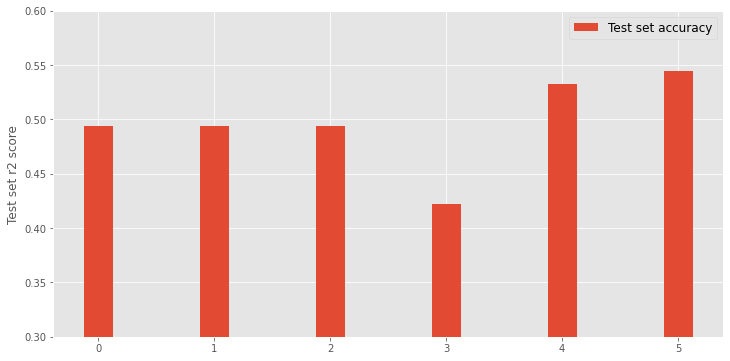

In [86]:
score=(rfc_score, lr_score, mnb_score, dtc_score, xgb_score, svc_score)
N = 6
ind = np.arange(N) 
width = 0.25
plt.figure(figsize=(12, 6))
x_label = ['rfc', 'lr', 'mnb', 'dtc', 'xgb','svc']
plt.bar(ind, score, width = width, label='Test set accuracy')
plt.ylim(0.3, 0.6)
plt.ylabel('Test set r2 score')
plt.legend(fontsize=12)

In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

clf = xgb.XGBClassifier(seed=2)
r2_scorer = make_scorer(r2_score,pos_label='H')
grid_obj = GridSearchCV(clf,
                        scoring=r2_scorer,
                        param_grid=parameters,
                        cv=5)
grid_obj = grid_obj.fit(X_train,y_train)
clf = grid_obj.best_estimator_
print (clf)
def predict_labels(clf, features, target):
# Report the final F1 score for training and testing after parameter tuning
r2, acc = predict_labels(clf, X_train, y_train)
print ('r2 score and accuracy score for training set: {:.4f} , {:.4f}.').format(r2 , acc)
    
r2, acc = predict_labels(clf, X_test, y_test)
print=('r2 score and accuracy score for test set: {:.4f} , {:.4f}.').format(r2 , acc)

IndentationError: expected an indented block (<ipython-input-58-f12a935ba642>, line 27)

In [268]:
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print ()
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ()
train_predict(clf_C, X_train, y_train, X_test, y_test)
print ()

Training a LogisticRegression using a training set size of 3432. . .
Trained model in 0.0967 seconds
Made predictions in 0.0005 seconds.


C:\Users\23500\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\23500\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [226]:
clf_xgb=xgb.XGBClassifier(objective='binary:logestic',missing=None,seed=42)
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)])

C:\Users\23500\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\23500\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBoostError: [10:12:03] ..\src\metric\rank_metric.cc:507: Check failed: preds.Size() == info.labels_.Size() (2574 vs. 858) : label size predict size not match

In [113]:
params = {}
params['objective'] = 'multi:softprob'
params['eval_metric'] = 'map@5'
params['num_class'] = 3
params['tree_method'] = 'exact'
params['silent'] = 0

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)
watchlist = [(d_test,'eval'),(d_train,'train')]
clf = xgb.train(params, d_train, 200, watchlist, early_stopping_rounds=50, verbose_eval=True)

[08:38:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBoostError: [08:38:54] ..\src\metric\rank_metric.cc:169: Check failed: preds.Size() == info.labels_.Size() (6435 vs. 2145) : label size predict size not match